# Un detector de imágenes muy sencillo utilizando correlación

A partir de un template de referencia, podemos buscar la presencia de ese template en una imagen.

In [27]:
from scipy import signal
from scipy import misc
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

face = rgb2gray(misc.face()) - rgb2gray(misc.face()).mean()
template = np.copy(face[250:350, 525:625]) # right eye
template -= template.mean()
face = face + np.random.randn(*face.shape) * 50 # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape) # find the match

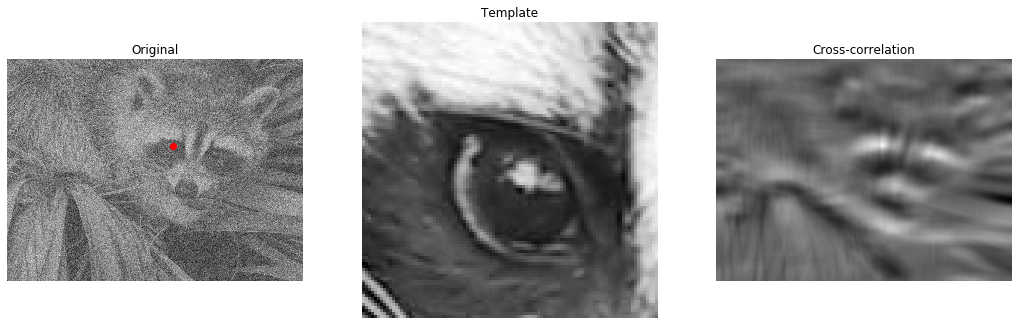

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(1, 3,figsize=(18,12))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
plt.show()

# Detector de letras

In [1]:
a=list()
a.append([
    [0,0,0,1,1,0,0,0],
    [0,0,1,1,1,1,0,0],
    [0,1,1,0,0,1,1,0],
    [0,1,1,0,0,1,1,0],
    [0,1,1,1,1,1,1,0],
    [0,1,1,0,0,1,1,0],
    [0,1,1,0,0,1,1,0],
    [0,1,1,0,0,1,1,0]])

a.append([
    [1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,0],
    [1,1,1,1,1,1,1,0]])

a.append([
    [1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0]])


In [32]:
import numpy as np
import random
a=np.array(a)

In [39]:
textos=list()
labels=list()
ruido=0.1
size=1024
indices=[0,1,2]
for idx in range(size):
    l1=random.choice(indices)
    l2=random.choice(indices)
    l3=random.choice(indices)
    textos.append(np.hstack([a[l1],a[l2],a[l3]])+np.random.rand(8,24)*ruido)
    label=[np.zeros(3),np.zeros(3),np.zeros(3)]
    label[0][l1]=1
    label[1][l2]=1
    label[2][l3]=1
    labels.append(label)

In [40]:
labels[1][0]

array([0., 1., 0.])

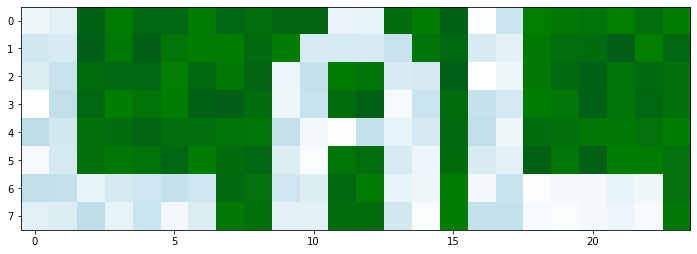

In [75]:
#Visualizamos los datos g
import matplotlib.pylab as plt
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(textos[32], cmap=plt.cm.ocean)
plt.show()

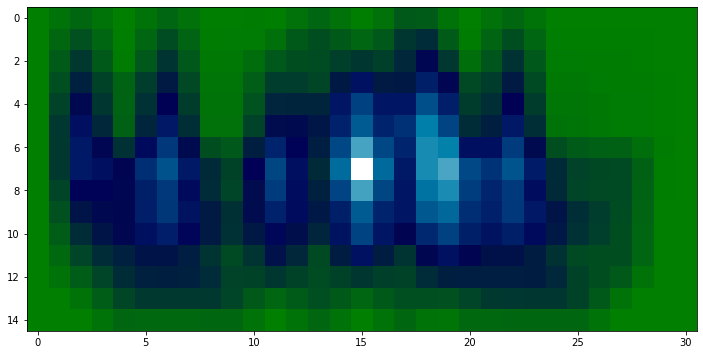

[array([0., 1., 0.]), array([1., 0., 0.]), array([0., 1., 0.])]


In [74]:
import scipy.signal as ss
corr=ss.correlate2d(textos[32],a[0])
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(corr, cmap=plt.cm.ocean)
plt.show()
print(labels[32])